# Measuring Income Inequality
Matthew Holden 

Bárbara Flores


In these exercises, we will load and work with a vector that contains estimates of the total income (from all sources) of a random sample of American households collected by the U.S. Census Bureau in 2019 as part of the American Community Survey (ACS).

In particular, we are going to use this data to measure household income inequality in the United States, then analyze how that income inequality might change under a range of different tax policies.



In [33]:
# The first step is to import the libraries to be used and create the dictionary in which we will store the results.
import numpy as np
from matplotlib import pyplot as plt
from ineqpy.inequality import gini

results = dict()

## Exercise 1 - Loading data

In [34]:
# Next, we import the data to be used.
data = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
print(data)

[ 53308. 102050. 192994. ... 407460.  19856. 154754.]


## Exercise 2 - Plotting data
One of the best ways we have for getting a feel for our data is to plot our data. We will talk much more extensively about plotting in upcoming lessons, but for the moment it’s sufficient to know that you can plot a histogram of a numpy vector with plt.hist() method to plot your income data.

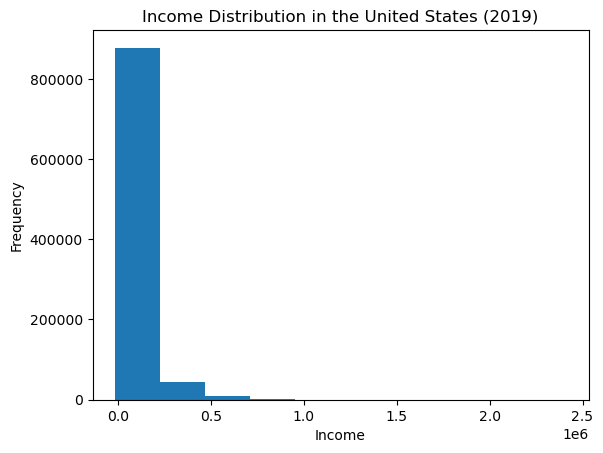

In [35]:
# We use the matplotlib library to plot a histogram.
plt.hist(data)
plt.title("Income Distribution in the United States (2019)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Does it look like a normal distribution? Uniform? Does this make you think that income inequality is relatively high or low in the United States?

><span style="color: #008080">*R: At first glance in the graph, an unequal distribution of income is observed in the USA, where segments with higher incomes disproportionately represent high values. We do not see income distributed normally*</span>

## Exercise 3 - Focused Histogram Analysis

You will likely notice that much of the plot is difficult to see because most of the plot is taken up by very high earners.
Since the x-axis of our plot is determined by the range of our data, we can create a histogram of US household incomes that includes only households making less than $500,000 to improve our ability to visualize what’s going on at lower incomes.

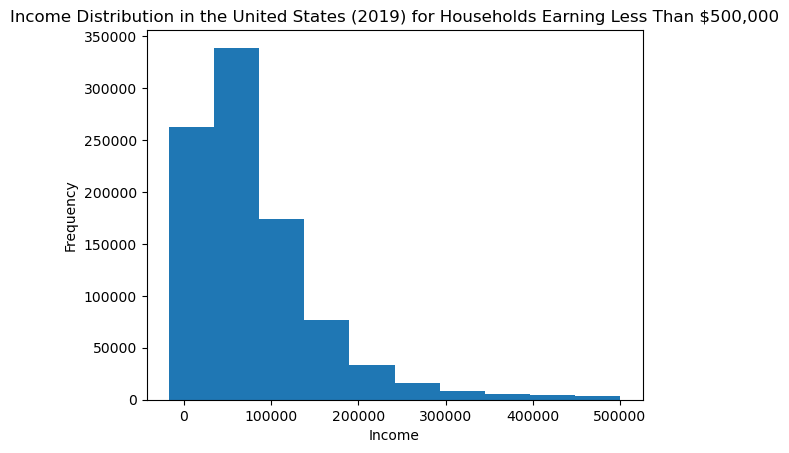

In [36]:
plt.hist(data[data < 500_000])
plt.title(
    "Income Distribution in the United States (2019) for Households Earning Less Than $500,000"
)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

For these households—the non-millionaires—do we see a more uniform distribution of incomes? Or is there still a significant right-skew / positive-skew (most people are on the left of the distribution, but there are more extreme values in the right tail) in the income distribution?
In other words, is the skewness in the US income distribution driven by extreme high earners, or is it evident at all income levels?

<span style="color: #008080">*R: Upon excluding the highest incomes, we still do not observe a normal distribution of incomes. Instead, the disparity in the income distribution in the United States appears to be driven by individuals with extremely high incomes. This suggests that the inequality in the US income distribution is not limited to just the highest income levels, but rather extends across various income levels.*</span>

### Gini Index
A standard measure of inequality is the Gini Index / Gini Coefficient. The measure takes on a value of 0 when everyone in a population has the same allocation of some resource or property, and a value of 1 when all the resource in population accrues to a single person. It is commonly used to measure income and wealth inequality, although it is also worth noting that it has been used in many other contexts, including neuroscience.


## Exercise 4 -  US poverty line 

The US poverty line is about 20,000 dollars a year. What share of households in these data fall below the US poverty line? ( “share”: the proportion, a value between 0 and 1).

Using the gini function above, calculate the Gini Index of income inequality in the US. What is that value?

Store your share of households under 20,000 as ex4_share_below_poverty, store the gini score as ex4_gini.

In [37]:
# share of households in these data fall below the US poverty line
ex4_share_below_poverty = (data < 20_000).mean()
ex4_gini = gini(data)

# printing results
print(
    f"The share of households in these data fall below the US poverty line is: {ex4_share_below_poverty:.2%}"
)
print(
    f"The Gini index of the vector that contains estimates of the total income of a random sample of American households is: {ex4_gini:.3f}"
)

# storing results in results dictionary
results["ex4_share_below_poverty"] = ex4_share_below_poverty
results["ex4_gini"] = ex4_gini

The share of households in these data fall below the US poverty line is: 14.71%
The Gini index of the vector that contains estimates of the total income of a random sample of American households is: 0.481


><span style="color: #008080">*R: Nearly 15% of households are in the US poverty line.*</span>

><span style="color: #008080">*Upon calculating the Gini index, we obtain a value of 0.48*</span>

## Exercise 5 - Comparing US Income Inequality: Gini Index Across Countries

><span style="color: #008080">*When we compare the Gini index of the United States (0.48) to that of other countries using resources such as [indexmundi.com](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings), a clear picture emerges. The United States stands out as one of the countries with a relatively high Gini index, signifying substantial income inequality. This observation aligns with expectations, as income inequality has been a topic of concern and debate within the United States in recent years. However, it's crucial to recognize that the Gini index, while a valuable tool, offers only one dimension of measuring inequality. For a more comprehensive assessment, one can explore alternative metrics, such as the income ratio between the top 0.1% of earners and the lowest-earning 10% of the population, or consider wealth distribution instead of income. While the Gini index paints a clear picture of income inequality, it is essential to acknowledge that the full spectrum of inequality is more multifaceted and may warrant further investigation."*</span>

## Exercise 6 - Analyzing Policies to Reduce Income Inequality: Policy A vs. Policy B

Congratulations! You have been hired by the President of the United States to advise them on their efforts to reduce income inequality. The first set of policies that the president has asked you to evaluate is whether income inequality would be decreased more under:

* Policy A: giving every household that makes less than 40,000 dollars a check for 5,000 dollars.

* Policy B: giving every household that makes less than 30,000 dollars a check for 7,000 dollars.

What is the new Gini under Policy A? 
What is the new Gini under Policy B? 


In [38]:
# Store in the results dict under the key "ex6_gini_policy_a".Store in the results dict under the key "ex6_gini_policy_b".

# calculating results of Policy A and  Policy B
house_40k = data.copy()
house_30k = data.copy()
house_40k[house_40k < 40_000] = house_40k[house_40k < 40_000] + 5_000
house_30k[house_30k < 30_000] = house_30k[house_30k < 30_000] + 7_000
ex6_gini_policy_a = gini(house_40k)
ex6_gini_policy_b = gini(house_30k)

# printing results
print(f"With the policy A, the Gini index obtained is: {ex6_gini_policy_a:.3f}")
print(f"With the policy B, the Gini index obtained is: {ex6_gini_policy_b:.3f}")

# storing results in results dictionary
results["ex6_gini_policy_a"] = ex6_gini_policy_a
results["ex6_gini_policy_b"] = ex6_gini_policy_b

With the policy A, the Gini index obtained is: 0.460
With the policy B, the Gini index obtained is: 0.458


><span style="color: #008080">*We can observe that with both policies, the Gini index decreases slightly, indicating a positive effect on reducing inequality.*</span>

><span style="color: #008080">*With Policy A, we obtain a Gini index of 0.427, and with Policy B, we obtain a Gini index of 0.425*</span>


Which has lowered inequality more? Store your answer as the string "Policy A" or "Policy B" in the results dict under the key "ex6_gini_which_reduced_more.

In [39]:
results["ex6_gini_which_reduced_more"] = "Policy B"

><span style="color: #008080">*R: The policy that has lowered inequality more is Policy B.*</span>

><span style="color: #008080">*It's worth noting that in reality, policies such as 'giving money to people with lower incomes' are not always as straightforward, and the impact on the Gini index is not so direct. There can be effects on fiscal costs and inflation. Work disincentives may arise, and so on.*</span>

## Exercise 7

Now the president would like to know whether income inequality can be reduced more the policy you decided was preferable above, or through Policy C: applying a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt.

(In other words, Policy C would reduce the income of any households earning more than 250,000 dollars by 5%.)

Calculate the Gini Index resulting from the President’s tax proposal? Store in the results dict under the key "ex7_gini_policy_c".

In [40]:
# Calculating results of Policy C
house_5percent = data.copy()
house_5percent[house_5percent > 250_000] = (
    house_5percent[house_5percent > 250_000] * 0.95
)
ex7_gini_policy_c = gini(house_5percent)

# Printing Resuts
print(f"With the policy C, the Gini index obtained is: {ex7_gini_policy_c:.3f}")

# storing results in results dictionary
results["ex7_gini_policy_c"] = ex7_gini_policy_c

With the policy C, the Gini index obtained is: 0.476


><span style="color: #008080">*R: With policy C, the obtained Gini index is: 0.476.*</span>

><span style="color: #008080">*Policy C is less effective than policies A and B in terms of reducing inequality..*</span>

## Exercise 8

Now suppose we were thinking about applying a 5% tax to people making more than 250,000 dollars and evenly distributed that tax revenue to households earning less than 30,000 dollars. Call this Policy D.

To estimate the effective such a policy on inequality, first calculate the total amount of money that would be generated by this tax if the households in this data were all households in the US. Store in the results dict under the key "ex8_revenue_raised".

Note: because these data are just a sample of households in the US, the quantity you calculate isn’t the actual revenue such a tax would generate in the real world; if you want to calculate the real amount that would be raised, you can multiply the quantity you calculate by 137 (our data include about 1 out of every 137 households in the US).

In [41]:
# Calculating the money generated from 5% tax
ex8_revenue_raised = sum(data[data > 250_000] * 0.05)

# Printing Results
print(
    f"The total amount of money that would be generated from applying a 5% tax on people making more than 250_000 dollars is: ${ex8_revenue_raised:,.2f} dollars"
)

# storing results in results dictionary
results["ex8_revenue_raised"] = ex8_revenue_raised

The total amount of money that would be generated from applying a 5% tax on people making more than 250_000 dollars is: $929,623,340.85 dollars


## Exercise 9

Now calculate the total number of households earning less than 30,000 dollars in these data, and divide the revenue generated by the tax by the number of households earning less than 30,000 dollars. This is the amount of transfer these household would receive. Store in your results dict with the key "ex9_transfers".

Note: unlike in Question 8, the quantity you estimate here is a good estimate of the amount of money that would be available for each household if we imposed this tax on the real world. Why? Because both the quantity you estimated in Question 8 and the number of households you calculate here represent 1/137th the actual, real world quantities in the United States. So when you divide one by the other, you get the true ratio – the fact that both are 1/137th the real quality cancels out!

In [42]:
# Count households earning less than 30,000 dollars
household_count = np.sum(data < 30000)

# Calculate the amount transfered to low income households
ex9_transfers = ex8_revenue_raised / household_count

# Printing Results
print(
    f"The amount transferred to households earning less than 30,000 dollars is {ex9_transfers:.2f}."
)

# Storing results in results dictionary
results["ex9_transfers"] = ex9_transfers

The amount transferred to households earning less than 30,000 dollars is 4208.23.


## Exercise 10

Finally, update the incomes in our data as if we had enacted this policy – reduce the incomes of households earning more than 250,000 dollars by 5% and increase the incomes of households earning less than 30,000 dollars by the quantity you estimated in Question 8.

What is the resulting Gini Index of Policy D? Store as ex10_gini_policy_d.

In [43]:
# Calculating effect of Policy D
policy_d = data.copy()
policy_d[policy_d > 250_000] = policy_d[policy_d > 250_000] * 0.95
policy_d[policy_d < 30_000] = policy_d[policy_d < 30_000] + ex9_transfers
ex10_gini_policy_d = gini(policy_d)

# Printing Resuts
print(f"With the policy D, the Gini index obtained is: {ex10_gini_policy_d}")

# storing results in results dictionary
results["ex10_gini_policy_d"] = ex10_gini_policy_d

With the policy D, the Gini index obtained is: 0.46166900570205477


## Exercise 11

Now suppose we also wanted to explore a slightly different intervention: Policy E. In Policy E, we would distribute the revenue generated with the same tax, but this time we would distribute it evenly to all households earning less than 40,000 dollars (instead of less than 30,000 dollars).

What is the resulting Gini Index of Policy E? Store as ex11_gini_policy_e.

In [44]:
# Calculating effect of Policy E
policy_e = data.copy()
policy_e[policy_e > 250_000] = policy_e[policy_e > 250_000] * 0.95
policy_e[policy_e < 40_000] = policy_e[policy_e < 40_000] + ex8_revenue_raised / (
    np.sum(data < 40000)
)
ex11_gini_policy_e = gini(policy_e)

# Printing Resuts
print(f"With the policy E, the Gini index obtained is: {ex11_gini_policy_e:.5f}")

# storing results in results dictionary
results["ex11_gini_policy_e"] = ex11_gini_policy_e

With the policy E, the Gini index obtained is: 0.46265


## Exercise 12

If the President asked you whether you could better reduce inequality (as measured by the Gini Index) by re-distributing the tax revenue from taxing households earning more than 250,000 dollars even to households earning less than 30,000 dollars (Policy D) or households earning less than 40,000 dollars (Policy E), which would you recommend? Assign the string "Policy D" or "Policy E" to your results dict under the key ex12_policy_recommendation.

In [45]:
results["ex12_policy_recommendation"] = "Policy D"

><span style="color: #008080">*R: We would recommend Policy D: redistributing the tax revenue from households earning more than $250,000 even to households earning less than $30,000, as it generates a lower Gini index and therefore less inequality.*</span>

## Check answer

In [46]:
# results


assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}

In [47]:
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.4810925546879211,
 'ex6_gini_policy_a': 0.46024685074894556,
 'ex6_gini_policy_b': 0.4582821778789707,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900714,
 'ex8_revenue_raised': 929623340.8499994,
 'ex9_transfers': 4208.230382379833,
 'ex10_gini_policy_d': 0.46166900570205477,
 'ex11_gini_policy_e': 0.46264861963052434,
 'ex12_policy_recommendation': 'Policy D'}

## Data citation 
Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0

These data are intended for this exercise only. Individuals analyzing the data for other purposes must submit a separate data extract request directly via IPUMS USA.

Individuals are not to redistribute the data without permission. Contact ipums@umn.edu for redistribution requests.